# Determinant QMC data visualization

## Are you testing or making plots?

In [1]:
SAVEPLOTS = False

## Load simulation data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

sns.set()

# Retrieve simulation parameters

simulationParameters = np.loadtxt('simulationParameters.txt', usecols = 1)

NSITES = int(simulationParameters[0])
dt = simulationParameters[1]
beta = simulationParameters[2]
L = int(simulationParameters[3])
t = simulationParameters[4]
U = simulationParameters[5]
mu = simulationParameters[6]
totalMCSweeps = int(simulationParameters[7])
freq = int(simulationParameters[8])
intsize = int(simulationParameters[9])

# Load weights to plot

weights = np.loadtxt('LOGweights.txt', skiprows = 1)

M = weights.size

time = np.arange(M) + 1  #measured in sweeps
sweeps = np.arange(M / L) + 1

if SAVEPLOTS == 1:
    
    directory1 = (str(NSITES) + \
                 'sites_L=' + str(L) + \
                 '_beta=' + str(beta) + \
                 '_dt_' + str(dt) + '_t_' + \
                 str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

    directory2 = (str(NSITES) + \
                 'sites_L=' + str(L) + \
                 '_beta=' + str(beta) + \
                 '_dt_' + str(dt) + '_t_' + \
                 str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '/data-to-reproduce')
   
    
    if not os.path.exists(directory1):
        os.makedirs(directory1)

    if not os.path.exists(directory2):
        os.makedirs(directory2)

    np.savetxt(directory2 + '/weights_' + \
               'totalMCSweeps_' + str(totalMCSweeps) + \
               '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (weights))
    np.savetxt(directory2 + '/simulationParameters_' + \
               'totalMCSweeps_' + str(totalMCSweeps) + \
               '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (simulationParameters))

# Metropolis Sampling convergence

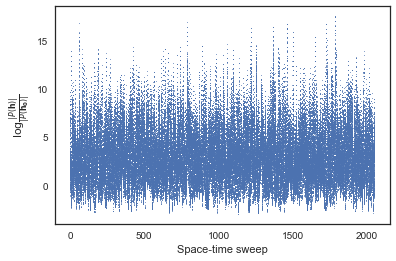

In [3]:
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.scatter(time / L, weights, s = 0.3)
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
if SAVEPLOTS == True:
    plt.savefig(directory1 + '/weightsVsMCsweep' + str(totalMCSweeps) + 'sweeps' + '_freq_' + str(freq)
            + '_intsize_' + str(intsize) + '.png', dpi = 600)

# Sign problem

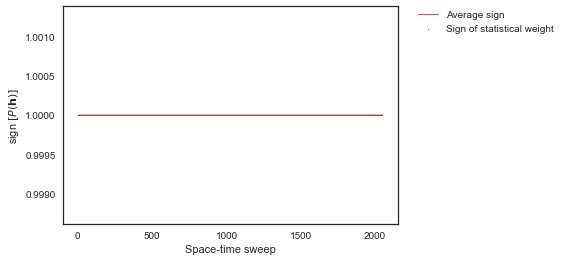

In [4]:
sns.set_style("white")
signs = np.loadtxt("signs.txt", skiprows = 1)
avSign = np.mean(signs) * np.ones(len(sweeps))
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.set_color_codes("dark")

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'sign' + r' $[P(\mathbf{h})]$ ')

ax.scatter(sweeps, signs, s = 0.3, color = "#34495e", label = 'Sign of statistical weight')
ax.plot(sweeps, avSign, linewidth = 1, color = "#e74c3c", label = 'Average sign')
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
if SAVEPLOTS == True:
    plt.savefig(directory1 + '/avSign' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600,
                bbox_extra_artists=(lgd,), bbox_inches='tight')

# Measuments

In [4]:
observables = np.loadtxt('measurementsScalars.txt', skiprows = 1)

## Electron density

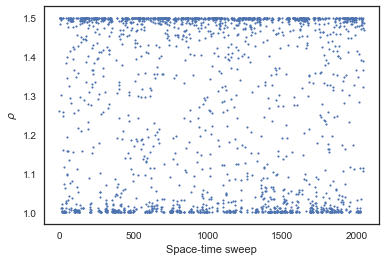

In [13]:
electronDensity = observables[:, 0]
plt.scatter(sweeps, electronDensity, s = 3)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'$\rho$')
if SAVEPLOTS == True:
    np.savetxt(directory2 + '/electronDensity' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (electronDensity))
    plt.savefig(directory1 + '/electronDensity' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600)

In [14]:
rho = np.mean(electronDensity) / 1

In [15]:
(rho - 1)

0.2862196396845702

## Double occupancy

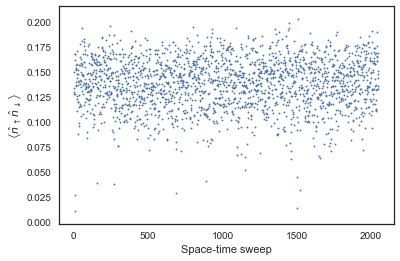

In [5]:
doubleOc = observables[:, 1]
plt.scatter(sweeps, doubleOc, s = 2)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'$\left\langle \hat{n}_\uparrow \hat{n}_\downarrow \right\rangle$')
if SAVEPLOTS == 1:
    np.savetxt(directory2 + '/doubleOc' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (doubleOc))
    plt.savefig(directory1 + '/doubleOc' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600)

In [6]:
np.mean(doubleOc)

0.1382304425394873

## Auto-correlation time for double occupancy $\left\langle n_\uparrow n_\downarrow \right \rangle$

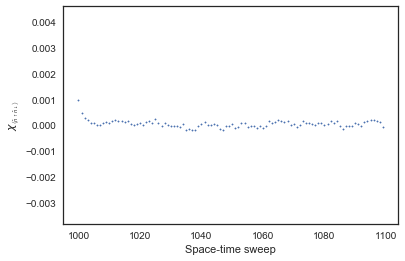

In [333]:
W = 1000
m = np.mean(doubleOc[W:])
tMax = 100
chi_nUp_nDown = np.zeros(tMax)

for t in range(tMax):
    chi_nUp_nDown[t] = np.sum( ( doubleOc[W:tMax + W] - m ) * ( doubleOc[t + W:t + tMax + W] - m ) )

plt.scatter(np.arange(tMax) + W, chi_nUp_nDown, s = 2)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'$\chi_{_{\left\langle \hat{n}_\uparrow \hat{n}_\downarrow \right\rangle}}$')
if SAVEPLOTS == True:
    np.savetxt(directory2 + '/doubleOc' + str(totalMCSweeps) + \
       '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (doubleOc))
    plt.savefig(directory1 + '/doubleOcAutoCorr' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600)

In [334]:
meanDoubleOc = 0
meanDoubleOcSq = 0
for idx, D in enumerate(doubleOc[W:]):
    if idx % 2 == 0:
        meanDoubleOc += D
        meanDoubleOcSq += D**2
2 * meanDoubleOc / ( totalMCSweeps - W )

0.099204780998704195

In [335]:
2 * meanDoubleOc / ( totalMCSweeps - W ) * U

0.39681912399481678

In [336]:
np.sqrt(2 * meanDoubleOcSq / ( totalMCSweeps - W ) - ( 2 * meanDoubleOc / ( totalMCSweeps - W ) )**2)

0.002802362316685212

In [337]:
np.sqrt(np.var(doubleOc[W:]) / NSITES)

0.00035939155974707196

# Magnetic structure factor $S(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \left\langle \mathbf S_{\mathbf i} \cdot \mathbf S_{\mathbf j} \right\rangle $

## Auto-correlation time in the measurement of the correlation functio

In [19]:
magCorrMeas = np.loadtxt('SpinSpinCorrelations.txt', skiprows = 1)

Text(0,0.5,'$\\chi_{_{<\\mathbf{S}_0^{\\quad 2}>}}$')

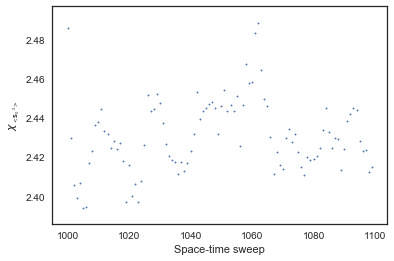

In [289]:
tMax = 100
chiMag = np.zeros(tMax)
corrZeroZero = np.zeros(totalMCSweeps)
for m in range(totalMCSweeps - W):
    corrZeroZero[m] = magCorrMeas[(m + W)*NSITES:(m + W + 1)*NSITES][0, 0]

meanCorr = np.mean(corrZeroZero[W:])

for t in range(tMax):
    chiMag[t] = np.sum( ( corrZeroZero[W:tMax + W] - meanCorr ) * ( corrZeroZero[t+W:t + tMax+W] - meanCorr ) )
    
plt.scatter(np.arange(tMax) + W, chiMag, s = 2)
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'$\chi_{_{<\mathbf{S}_0^{\quad 2}>}}$')

## Average spin-spin correlation function

In [21]:
W = 0
magCorr = np.zeros((NSITES, NSITES))
for m in range(totalMCSweeps - W):
    if m % 1 == 0:
        magCorr += ( magCorrMeas[(m+W)*NSITES:(m + 1+W)*NSITES] \
                        - magCorr ) / ( ( m + 1) / 1 )

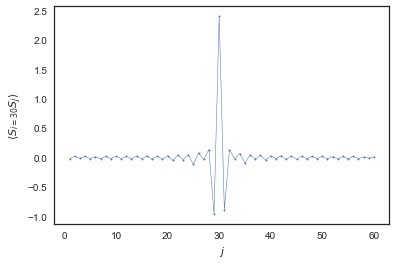

In [368]:
plt.scatter( 60 - np.arange(NSITES), magCorr[30, :], s = 2, marker = 'o')
plt.plot( 60 - np.arange(NSITES), magCorr[30, :], linewidth = 0.5)
plt.xlabel(r'$j$')
plt.ylabel(r'$\left\langle S_{i = 30} S_j \right\rangle$')
if SAVEPLOTS == True:
    np.savetxt(directory2 + '/magCorr' + str(totalMCSweeps) + \
       '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (doubleOc))
    plt.savefig(directory1 + '/magCorr' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600)

## Fourier transform to obtain the structure factor    

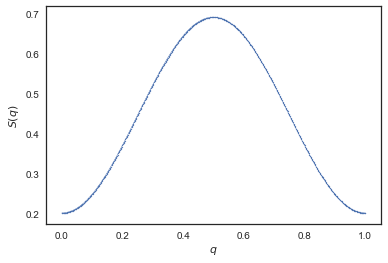

In [24]:
n_qs = 500
qMax = 2*np.pi
qs = np.arange(0, qMax + qMax/n_qs, qMax/n_qs)
S = np.zeros(n_qs+1)
dist = 0

for idx, q in enumerate(qs):
#    for x in range(int(np.sqrt(NSITES))):
#        for y in range(int(np.sqrt(NSITES))):
    for x in range(NSITES):
        for y in range(NSITES):
            if ( x - y ) > 29:
                dist = 60 - abs(x - y)
            else:
                dist = abs(x - y)
            #S[idx] += np.cos( ( x - y) * q ) * magCorr[x, y]
            S[idx] += np.cos( dist * q ) * magCorr[x, y]

S /= ( 4 * NSITES ) # factor of 16 comes from 1/2 spins and overcounting

plt.scatter(qs/2/np.pi, S, s = 1)
plt.plot(qs/2/np.pi, S, linewidth = 0.5)
plt.xlabel(r'$q$')
plt.ylabel(r'$S(q)$')
if SAVEPLOTS == True:
    np.savetxt(directory2 + '/S(q)' + str(totalMCSweeps) + \
       '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (doubleOc))
    plt.savefig(directory1 + '/S(q)' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600)

In [382]:
S[0]

0.04822271304346528

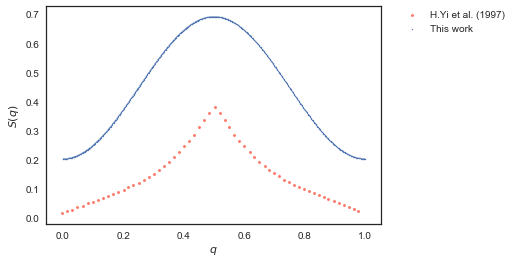

In [25]:
compare = np.loadtxt("compare.csv")
fig = plt.figure(0)
ax = fig.add_subplot(111)
plt.xlabel(r'$q$')
plt.ylabel(r'$S(q)$')
ax.scatter(compare[:, 0], compare[:, 1], s = 4, color = 'salmon', marker = 'x', label = 'H.Yi et al. (1997)')
ax.scatter(qs/2/np.pi, S, s = 1, label = 'This work')
ax.plot(qs/2/np.pi, S, linewidth = 0.5)
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### It has a maximum at $q = \pi$ signaling quasi-AF order

In [120]:
qs[np.argmax(S)]

3.1415926535897931

# Magnetic susceptibility $\chi(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \int_0^\beta \left\langle \mathbf S_{\mathbf i}(\tau) \cdot \mathbf S_{\mathbf j}(0) \right\rangle d\tau $

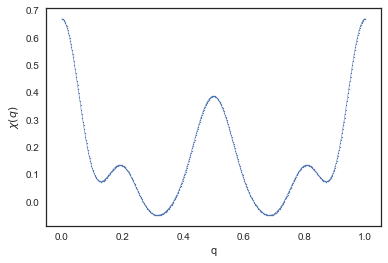

In [218]:
UneqMagCorrMeas = np.loadtxt('UneqTimeSpinSpinCorrelations.txt', skiprows = 1)

UneqMagCorr = np.zeros((NSITES, NSITES))

# Average unequal time spin-spin correlation function

for m in range(totalMCSweeps - W):
    if m % 100 == 0:
        UneqMagCorr += ( UneqMagCorrMeas[(m + W)*NSITES:(m + W + 1)*NSITES]\
                        - UneqMagCorr ) / ( ( m + 1) / 100 )
    
# Compute structure factor    
    
n_qs = 500
qMax = 2*np.pi
threshold = 0
qs = np.arange(threshold * qMax/n_qs, qMax - (threshold - 1) * qMax/n_qs , qMax/n_qs)
MagSus = np.zeros(n_qs - 2 * threshold + 1)

for idx, q in enumerate(qs):
    for x in range(int(np.sqrt(NSITES))):
        for y in range(int(np.sqrt(NSITES))):
#    for x in range(NSITES):
#        for y in range(NSITES):
            if ( x - y ) > 30:
                dist = 60 - (x - y)
            else:
                dist = x - y
            MagSus[idx] += np.cos( dist * q) * UneqMagCorr[x, y]

MagSus /= ( 16 * np.sqrt(NSITES)**2 ) / dt # factor of 4 comes from 1/2 spins

plt.scatter(qs / 2 / np.pi, MagSus, s = 1)
plt.plot(qs / 2 / np.pi, MagSus, linewidth = 0.5)

plt.xlabel(r'q')
plt.ylabel(r'$\chi(q)$')
if SAVEPLOTS == True:
    np.savetxt(directory2 + '/chi(q)' + str(totalMCSweeps) + \
       '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (doubleOc))
    plt.savefig(directory1 + '/chi(q)' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.png', dpi = 600)

In [219]:
compare1 = np.loadtxt("compare1.csv")

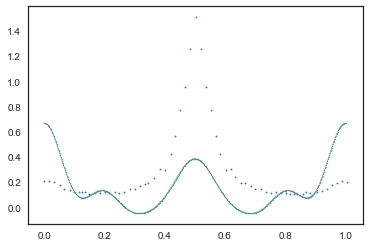

In [220]:
plt.scatter(compare1[:, 0], compare1[:, 1], s = 2)
plt.scatter(qs / 2 / np.pi, MagSus, s = 1)
plt.plot(qs / 2 / np.pi, MagSus, linewidth = 0.5)

# Again, it has a maximum at $q = \pi$ signaling quasi-AF order

In [240]:
threshold = 50
qs[np.argmax(MagSus[threshold:n_qs-threshold]) + threshold]

3.1415926535897931

## Auto-correlation time in the measurement of the unequal-time correlation function# 

Text(0,0.5,'$\\chi_{_{<\\mathbf{S}_0 (\\tau) \\cdot \\mathbf{S}_1 (0) >}}$')

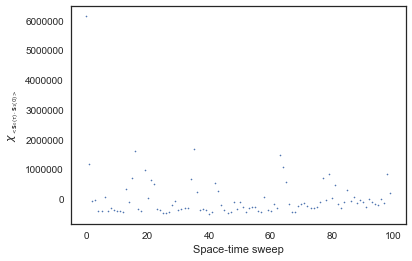

In [98]:
autoCorr = np.zeros(tMax)
Uneq = np.zeros(totalMCSweeps)
for m in range(totalMCSweeps - W):
    Uneq[m] = UneqMagCorrMeas[(m + W)*NSITES:(m + W + 1)*NSITES][0, 1]
av = Uneq.mean()
for t in range(tMax):
    autoCorr[t] = np.sum( ( Uneq[W:tMax+W] - av ) * ( Uneq[t+W:t + tMax+W] - av ) )
plt.scatter(np.arange(tMax), autoCorr, s = 1.5)    
plt.xlabel(r'Space-time sweep')
plt.ylabel(r'$\chi_{_{<\mathbf{S}_0 (\tau) \cdot \mathbf{S}_1 (0) >}}$')